In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [10]:
# Read the input file
sampling_freq, audio = wavfile.read('input_read.wav')

In [11]:
audio

array([ -3893, -18346, -10040, ...,  20294,  30307,   9682], dtype=int16)

In [12]:
#dir(audio)
dir(sampling_freq)

['__abs__',
 '__add__',
 '__and__',
 '__class__',
 '__cmp__',
 '__coerce__',
 '__delattr__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__getattribute__',
 '__getnewargs__',
 '__hash__',
 '__hex__',
 '__index__',
 '__init__',
 '__int__',
 '__invert__',
 '__long__',
 '__lshift__',
 '__mod__',
 '__mul__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__oct__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'bit_length',
 'conjugate',
 'denominator',
 'imag',
 'numerator',
 'real']

In [13]:
# Print the params
print '\nShape:', audio.shape
print 'Datatype:', audio.dtype
print 'Sampling Frequency:', float(sampling_freq)
print 'Duration:', round(audio.shape[0] / float(sampling_freq),3), 'seconds'


Shape: (132300,)
Datatype: int16
Sampling Frequency: 44100.0
Duration: 3.0 seconds


# Normalize the values
The audio signal is stored as 16-bit signed integer data. We need to normalize
these values:

In [14]:
audio = audio / (2.**15)
len(audio)

132300

In [15]:
audio

array([-0.11880493, -0.55987549, -0.30639648, ...,  0.61932373,
        0.92489624,  0.29547119])

In [16]:
2.**15

32768.0

# Extract first 30 values for plotting

In [17]:
audio = audio[:30]

In [18]:
# Build the time axis

In [23]:
x_values = np.arange(0, len(audio), 1) / float(sampling_freq)

In [24]:
# Convert to milliseconds
x_values *= 1000

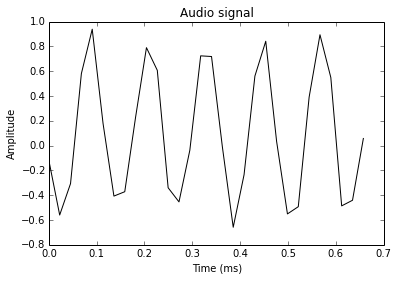

In [27]:
# Plotting the chopped audio signal
%matplotlib inline
plt.plot(x_values, audio, color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Audio signal')
plt.show()

# Transforming audio signals into the frequency domain

Audio signals consist of a complex mixture of sine waves of different frequencies,
amplitudes, and phases. Sine waves are also referred to as sinusoids. There is a
lot of information that is hidden in the frequency content of an audio signal. In fact,
an audio signal is heavily characterized by its frequency content. The whole world of
speech and music is based on this fact. Before you proceed further, you will need some
knowledge about Fourier transforms. A quick refresher can be found at http://www.thefouriertransform.com

In [28]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [30]:
# Read the input file
sampling_freq, audio = wavfile.read('input_freq.wav')

In [31]:
# Normalize the values
audio = audio / (2.**15)

### The audio signal is just a NumPy array. So, you can extract the length using the following code:

In [41]:
# Extract length
len_audio = len(audio)

Let's apply the Fourier transform. The Fourier transform signal is mirrored along the
center, so we just need to take the first half of the transformed signal. Our end goal
is to extract the power signal. So, we square the values in the signal in preparation
for this:

In [46]:
# Apply Fourier transform
transformed_signal = np.fft.fft(audio)


In [48]:
half_length = int(np.ceil((len_audio + 1) / 2.0))
transformed_signal = abs(transformed_signal[0:half_length])
transformed_signal /= float(len_audio)
transformed_signal **= 2

In [47]:
np.ceil(3.05)

4.0

In [45]:
# Extract length of transformed signal
len_ts = len(transformed_signal)

In [50]:
# Take care of even/odd cases
if len_audio % 2:
    transformed_signal[1:len_ts] *= 2
else:
    transformed_signal[1:len_ts-1] *= 2

In [51]:
# Extract power in dB
power = 10 * np.log10(transformed_signal)

In [53]:
# Build the time axis
x_values = np.arange(0, half_length, 1) * (sampling_freq / len_audio) / 1000.0

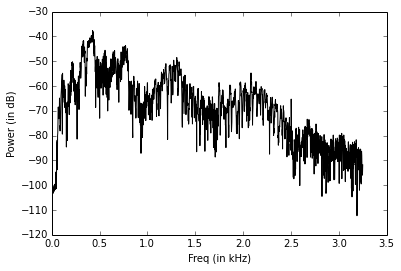

In [54]:
# Plot the figure
plt.figure()
plt.plot(x_values, power, color='black')
plt.xlabel('Freq (in kHz)')
plt.ylabel('Power (in dB)')
plt.show()

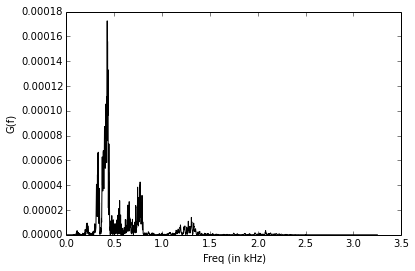

In [57]:
# Plot the figure
plt.figure()
plt.plot(x_values, transformed_signal, color='black')
plt.xlabel('Freq (in kHz)')
plt.ylabel('G(f)')
plt.show()

# Generating audio signals with custom parameters

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write


In [88]:
output_file='output_generated.wav'

*	 Let's specify the audio generation parameters. We want to generate a three-second
long signal with a sampling frequency of 44100 and a tonal frequency of 587 Hz.
The values on the time axis will go from -2*pi to 2*pi:

In [96]:
#audio paramethers
duration = 3 # seconds
sampling_freq = 44100 #Hz
tone_freq = 588
min_val = -2 * np.pi
max_val = 2 * np.pi



* Let's generate the time axis and the audio signal. The audio signal is a simple
sinusoid with the previously mentioned parameters:

In [97]:
#Generate audio
t = np.linspace(min_val, max_val, duration * sampling_freq)
audio = np.sin(2 * np.pi * tone_freq * t)


In [98]:
#Add some noise
noise = 0.4 * np.random.rand(duration*sampling_freq)
audio += noise

In [99]:
#Scale audio to 16-bit integers
scaling_factor=pow(2,15)-1
audio_normalized=audio/np.max(np.abs(audio))
audio_scaled=np.int16(audio_normalized*scaling_factor)


In [100]:
#Write to output file
write(output_file, sampling_freq, audio_scaled)

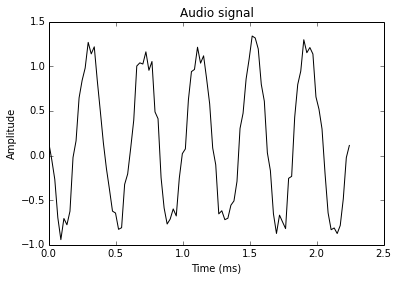

In [101]:
#plot first 100 values
audio=audio[:100]
x_values=np.arange(0, len(audio),1)/float(sampling_freq)
x_values *= 1000
# plotting the chopped audio
plt.plot(x_values, audio, color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Audio signal')
plt.show()

# Synthesizing music
Now that we know how to generate audio, let's use this principle to synthesize some music.
You can check out this link, http://www.phy.mtu.edu/~suits/notefreqs.html . This
link lists various notes, such as A, G, D, and so on, along with their corresponding frequencies.
We will use this to generate some simple music.

In [103]:
import json
import numpy as np
from scipy.io.wavfile import write
import matplotlib.pyplot as plt

In [115]:
#Synthesize tone
def synthesizer(freq, duration, amp=1.0, sampling_freq=44110):
    #Build the time axis
    t = np.linspace(0, duration, duration*sampling_freq)
    audio = amp * np.sin(2*np.pi*freq*t)
    return audio.astype(np.int16)

In [116]:
if __name__ == '__main__':
    tone_map_file = 'tone_freq_map.json'

In [117]:
with open(tone_map_file, 'r') as f:
    tone_freq_map = json.loads(f.read())


## Let's assume that we want to generate a G note for a duration of 2 seconds:

In [118]:
input_tone = 'G'
duration = 2
amplitude = 10000
sampling_freq = 44100

In [119]:
#Generate tone
synthesized_tone = synthesizer(tone_freq_map[input_tone], duration, amplitude, sampling_freq)

In [120]:
#write to output file
write('output_tone.wav', sampling_freq, synthesized_tone)


* Open this file in a media player and listen to it. That's the G note! Let's do something more interesting. Let's generate some notes in sequence to give it a musical feel. Define a note sequence along with their durations in seconds:

In [121]:
tone_seq = [('D', 0.3), ('G', 0.6), ('C', 0.5), ('A', 0.3),('Asharp', 0.7)]

In [122]:
# Construct the audio signal based on the chord sequence
output = np.array([])
for item in tone_seq:
    input_tone= item[0]
    duration = item[1]
    synthesized_tone = synthesizer(tone_freq_map[input_tone], duration, amplitude, sampling_freq)
    output = np.append(output, synthesized_tone, axis=0)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [123]:
write('output_tone_seq.wav', sampling_freq, output)

# Extracting frequency domain features
We discussed earlier how to convert a signal into the frequency domain. In most modern
speech recognition systems, people use frequency-domain features. After you convert a signal
into the frequency domain, you need to convert it into a usable form. Mel Frequency Cepstral
Coefficients (MFCC) is a good way to do this. MFCC takes the power spectrum of a signal
and then uses a combination of filter banks and discrete cosine transform to extract features.
If you need a quick refresher, you can check out http://practicalcryptography.
com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-
coefficients-mfccs . Make sure that the python_speech_features package is
installed before you start. You can find the installation instructions at http://python-speech-features.readthedocs.org/en/latest . Let's take a look at how to extract
MFCC features.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank

In [4]:
sampling_freq, audio = wavfile.read('input_freq.wav')


In [5]:
# Extract MFCC and filter bank features
mfcc_features = mfcc(audio, sampling_freq)
filterbank_features = logfbank(audio, sampling_freq)

In [6]:
# Print parameters to see how many windows were generated
print '\nMFCC: \nNumber of windows =', mfcc_features.shape[0]
print '\nLength of each feature =', mfcc_features.shape[1]
print '\nFilter bank:\nNumber of windows =', filterbank_features.shape[0]
print 'Length of each feature =', filterbank_features.shape[1]


MFCC: 
Number of windows = 40

Length of each feature = 13

Filter bank:
Number of windows = 40
Length of each feature = 26


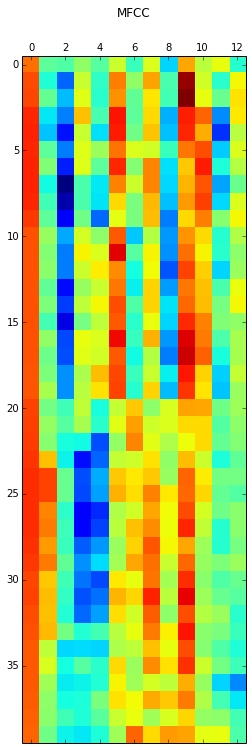

In [10]:
#Plot the features
mfcc_features = mfcc_features.T
plt.matshow(mfcc_features)
plt.title('MFCC')
plt.show()

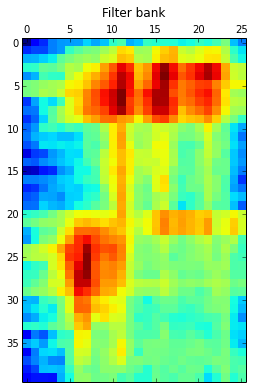

In [9]:
%matplotlib inline
filterbank_features=filterbank_features.T
plt.matshow(filterbank_features)
plt.title('Filter bank')
plt.show()